In [1]:
import xarray as xr
import numpy as np
import tools
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from datetime import datetime 
from datetime import timedelta

import scipy.interpolate as interp

scrip.so not found. Remapping function will not be available


# Assessment of the OSSE simulations

An assesment of the OSSE simulations will be done here. We will try to perform it in a analogue way to the one done for the OSE, where real observations were used for assimilation and assesment.

- SLA: The value of the NR at the position of the regular satellite tracks will be extracted and compared to the simulations.
    
- SST: The NR surface temperature field will be considered and subsampled, reducing the resolution to 10 km by picking one of every four observations both in vertical and horizontal.
    
- ARGO: Temperature and salinity profiles at position of the buoys during the experiment will be extracted from NR and simulations and compared
    
- TS profiles will algo be assesed in areas of the domain distant from assimialt4ed observations. This way, the capabilities of the model will also be assesed.

- HFR: The data samples taken apart for validation will be used for this purpose

## SST

### Calcualte RMSD

For each of the different experiments the RMSD is calculated for every day of simulation, interpolating the SLA field to the postion of the observations. The positions will be considered the same all along the experiment

In [15]:
import scipy.interpolate as interp
import skill_metrics as sm

# Define initial and end date
date = datetime(2014,9,21)
date_end = datetime(2014,10,19)

# Experiment names from which to extract equivalents to observations and to calculate RMSD
exp_names = ['NOASSIM', 'generic_nudging', 'all_future_nudging', 'all_actual_nudging', 'generic_nonudging', 'all_future_nonudging', 'all_actual_nonudging']
# number of days of simulation
ndays = (date_end - date).days

# Initialize empty dictionary and arrays
rmsd = {}
sst_obs_total = {}  # array containing all observations (concatenate each day obs)
sst_wmop_total = {}  # array containing all wmop obs
for exp in exp_names:
    rmsd[exp] = np.empty(ndays)
    sst_obs_total[exp] = np.array([])
    sst_wmop_total[exp] = np.array([])

# Loop over days
for i in range(ndays):
    
    strdate = date.strftime('%Y%m%d')    

    # Loop over different simulations
    for exp in exp_names: 

        if exp in ['NOASSIM']:
            path_wmop = '/home/modelling/data/workdir_2/HFR_DA/HFR_{0}_Oct2014'.format(exp)
        else:
            path_wmop = '/DATA/jhernandez/ROMS/Outputs/HFR_{0}_Oct2014_OSSE_v2/'.format(exp)
            

        file_wmop = '{0}/roms_WMOP_ASSIM_{1}_avg.nc'.format(path_wmop, strdate)
        file_nr = '/home/modelling/data/WMOP/WMOP_FORECAST/Outputs/FORECAST_CMEMS_RESTARTS/forecast_scratch//roms_WMOP_FORECAST_{0}_his.nc'.format(strdate)

        ds_wmop = xr.open_dataset(file_wmop)
        ds_nr = xr.open_dataset(file_nr)

        # Get SST values for WMOP and Observations (NR)
        nb=4 # subsampling
        sst1 = ds_wmop.temp[0,-1,1:-1:nb,1:-1:nb].values.reshape(-1)
        sst1 = sst1[np.isnan(sst1)==0]
        sst2 = ds_nr.temp[3,-1,1:-1:nb,1:-1:nb].values.reshape(-1) 
        sst2 = sst2[np.isnan(sst2)==0]

            # Compute RMSD
        rmsd[exp][i] = sm.rmsd(sst2, sst1)

        sst_obs_total[exp] = np.concatenate((sst_obs_total[exp], sst2))
        sst_wmop_total[exp] = np.concatenate((sst_wmop_total[exp], sst1))

    date = date + timedelta(days=1)
        
print('DONE')

DONE


In [ ]:
#rmsd

In [4]:
t0 = datetime(2014,9,21)
t = [t0 + timedelta(days=i) for i in range(31)]
xt = range(0,31,3)
tt = [time.strftime('%d/%m/%Y') for time in t]

In [16]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

#### Define Experiments

In [50]:
# Define experiments and labels for legend
exp_names = ['NOASSIM', 'generic_nudging', 'generic_nonudging', 'all_future_nudging', 'all_future_nonudging', 'all_actual_nudging', 'all_actual_nonudging']
labels = ['NOASSIM', 'GNR NDG', 'GNR ANL', 'HFR future NDG', 'HFR future ANL', 'HFR actual NDG', 'HFR actual ANL']
colors = ['m', 'olivedrab', 'darkgreen', 'dodgerblue', 'darkblue', 'salmon', 'darkred']

# Subset
subset = [1,3,5]
#subset = [2,4,6]
subset = [1,2,3,4,5,6]
exp_names = [exp_names[i] for i in subset];  labels = [labels[i] for i in subset]; colors = [colors[i] for i in subset]


#### Plot RMSD evolution

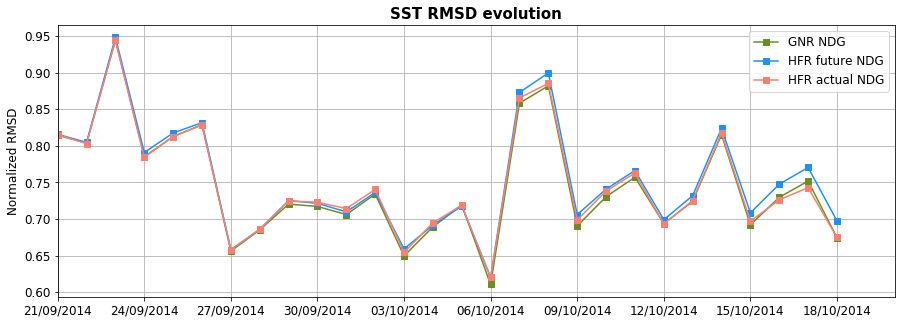

In [24]:
fig = plt.figure(figsize=(15,5))

for i, exp in enumerate(exp_names):
    
    plt.plot(rmsd[exp] / rmsd['NOASSIM'], marker='s', linestyle='-', color=colors[i])
plt.legend(labels)
plt.xticks(ticks=list(xt),labels=tt[0:-1:3])
plt.grid(True)
plt.title('SST RMSD evolution', fontsize=15, fontweight='bold')
plt.xlim((0,29))
plt.ylabel('Normalized RMSD')
plt.show()

In [25]:
fig.savefig('/home/jhernandez/Escritorio/OSSE_v2/rmsd_evolution_SST_OSSE_ndg.png', dpi=250)

In [49]:
for exp in exp_names[:]:
    
    print(exp)
    print(np.mean(rmsd[exp], axis=0)/ np.mean(rmsd['NOASSIM'], axis=0))
    print('')

NOASSIM
1.0

generic_nudging
0.7437886860654331

generic_nonudging
0.7593461416885662

all_future_nudging
0.7515958554704643

all_future_nonudging
0.7776269799779523

all_actual_nudging
0.7464724018774834

all_actual_nonudging
0.7650766599616613



In [ ]:
0.24/0.4
0.84/1.2

## Taylor Diagram

In [43]:
# Define experiments and labels for legend
exp_names = ['NOASSIM', 'generic_nudging', 'generic_nonudging', 'all_future_nudging', 'all_future_nonudging', 'all_actual_nudging', 'all_actual_nonudging']
labels = ['NOASSIM', 'GNR NDG', 'GNR ANL', 'HFR future NDG', 'HFR future ANL', 'HFR actual NDG', 'HFR actual ANL']
colors = ['black', 'olivedrab', 'darkgreen', 'dodgerblue', 'darkblue', 'salmon', 'darkred']

# Subset
#subset = [0,1,3,5]
#subset = [0,2,4,6]
subset = [0,1,2,3,4,5,6]
exp_names = [exp_names[i] for i in subset];  labels = [labels[i] for i in subset]; colors = [colors[i] for i in subset]


sdev = []; crmsd = []; ccoef = []; taylor_stats = {}

# Calculate taylor diagram stats for the different experiments selcted
for e in exp_names:
    taylor_stats[e] = sm.taylor_statistics(sst_wmop_total[e], sst_obs_total[e])
    sdev.append(taylor_stats[e]['sdev'][1])
    crmsd.append(taylor_stats[e]['crmsd'][1])
    ccoef.append(taylor_stats[e]['ccoef'][1])

# Add reference value and convert to array
sdev = np.array([taylor_stats['NOASSIM']['sdev'][0]] + sdev)
crmsd = np.array([taylor_stats['NOASSIM']['crmsd'][0]] + crmsd)
ccoef = np.array([taylor_stats['NOASSIM']['ccoef'][0]] + ccoef)

In [44]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

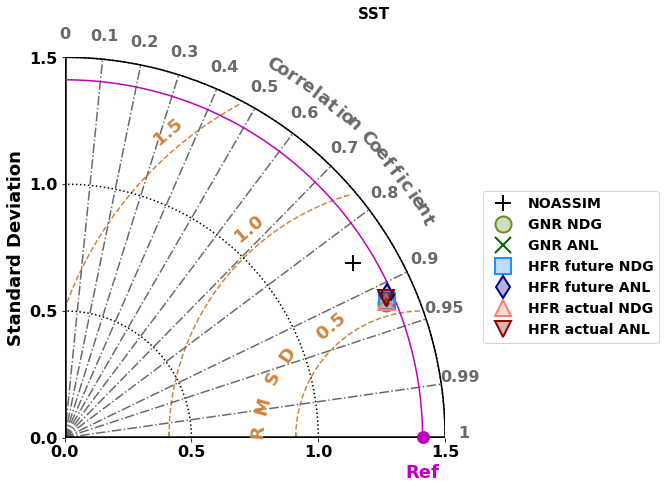

In [45]:
label = ['SLA'] + labels


fig_taylor_sst = plt.figure(num=1, figsize=(12,7))
sm.taylor_diagram(sdev,crmsd,ccoef, markerLabel=label,  markerLabelColor = 'r', markerDisplayed = 'marker',
                      markerLegend = 'on', markercolor = colors,
                      styleOBS = '-', colOBS = 'm', markerobs = 'o',
                      markerSize = 16,  
                      colRMS = 'peru', colCOR = 'dimgrey',
                      tickRMSangle = 130, showlabelsRMS = 'on',
                      titleRMS = 'on', titleOBS = 'Ref', checkstats = 'on', alpha=0.3)#, overlay=True)

plt.suptitle('SST', fontsize=15, fontweight='bold')
plt.show()

In [42]:
fig_taylor_sst.savefig('/home/jhernandez/Escritorio/OSSE_v2/taylor_diagram_SST_OSSE_ndg.png', dpi=250)